# Natural Language Processing with Disaster Tweets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv("datasets/test.csv")
df_train = pd.read_csv("datasets/train.csv")

## EDA

In [3]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_train = df_train.drop(["keyword"], axis=1)
df_train = df_train.drop(["location"], axis=1)
df_train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


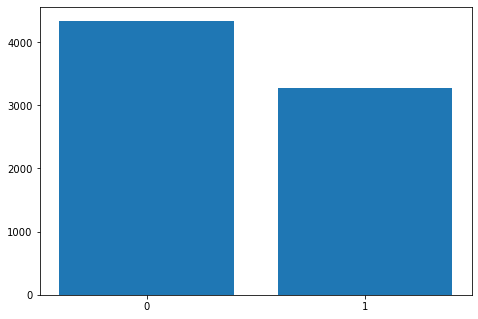

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
target_label = ['0', '1']
target_val = df_train.groupby('target').describe()["id"]["count"]
ax.bar(target_label,target_val)
plt.show()

## Pre-Processing
* Removing punctuation

In [7]:
import string

In [8]:
def preProcessing(df):
    ret = [c for c in df if c not in string.punctuation]
    ret = ''.join(ret)
    return ret

In [9]:
df_train['clean_text'] = df_train.text.apply(preProcessing)

In [10]:
df_train.head()

,id,text,target,clean_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


## Vectorization
* Bag-of-words model
    * 1 - Frequency of each token in msg
    * 2 - Frequent tokens receive low weigh
    * 3 - Normalize each vector

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
X = df_train.clean_text
y = df_train.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [14]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [15]:
X_train_dtm = vect.transform(X_train)

In [16]:
X_test_dtm = vect.transform(X_test)

In [17]:
sub_test = vect.transform(df_test.text)

In [18]:
transformer = TfidfTransformer()
transformer.fit(X_train_dtm)
transformer.transform(X_train_dtm)

<5709x18339 sparse matrix of type '<class 'numpy.float64'>'
	with 76648 stored elements in Compressed Sparse Row format>

## Model

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [20]:
mnb = MultinomialNB()
mnb.fit(X_train_dtm, y_train)

MultinomialNB()

In [21]:
y_pred = mnb.predict(X_test_dtm)

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.7867647058823529

## Submission

In [23]:
sample_submission = pd.read_csv("datasets/sample_submission.csv")

sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [25]:
pred_test = mnb.predict(sub_test)

sub = pd.DataFrame({"id": sample_submission["id"], "target": pred_test})

sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
sub.to_csv('submission.csv', index=False)

# Kaggle score: 80%